### KEGG Metabolic Reaction Network (Undirected)

#### KEGG Metabolic pathways modeled as un-directed reaction network. Variety of graphical features presented


KEGG Metabolic pathways can be realized into network. Two kinds of network / graph can be formed. These include Reaction Network and Relation Network. In Reaction network, Substrate or Product compound are considered as Node and genes are treated as edge. Whereas in the relation network, Substrate and Product componds are considered as Edges while enzyme and genes are placed as nodes. We tool large number of metabolic pathways from KEGG XML. They were modeled into the graph as described above. With the help of Cytoscape tool, variety of network features were compunted. 

In [10]:
import pandas as pd     # for string manipulation
import numpy as np      # for linear algebra
import seaborn as sns   # for fancy visvualization 
import matplotlib.pyplot as plt    # for performing eda and visualization
import os

import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from  xgboost  import  XGBRegressor


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn import ensemble

from sklearn import set_config
set_config(display = 'diagram')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv(r"/Users/mohitverma/Downloads/KEGG.data",sep=',',header =0)
df

,aac00010,1,15,8,0.086580087,506,5.90513834,2.260869565,0.102766798,0.350401292,...,0.423671497,0.233578016,0.672990777,11.73913043,0.3,0.175792305,5.905138339,0.18115942,23,44
0,aac00020,1,7,5,0.091503268,342,3.309942,2.526316,0.140351,0.324091,...,0.442857,0.135879,0.670008,5.789474,0.0,0.307019,3.309942,0.070175,19,44
1,aac00030,2,8,1,0.177489177,386,3.191710,2.434783,0.110672,0.683255,...,0.264447,0.150775,0.736842,5.478261,0.0,0.387645,2.974828,0.124638,23,56
2,aac00040,5,5,1,0.087719298,92,2.304348,1.500000,0.078947,0.447214,...,0.183333,0.184762,0.794286,2.900000,0.0,0.616221,1.948571,0.000000,20,26
3,aac00051,2,5,1,0.196969697,112,2.446429,2.000000,0.166667,0.554700,...,0.270192,0.138462,0.750769,3.538462,0.0,0.509972,2.246154,0.000000,13,22
4,aac00052,3,7,1,0.317028986,424,3.009434,2.000000,0.083333,0.787401,...,0.313481,0.089684,0.756571,4.640000,0.0,0.451110,2.704000,0.054444,25,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65548,zmo00950,1,1,1,?,2,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,2,1
65549,zmo00960,3,1,1,0,6,1.000000,1.000000,0.200000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,6,3
65550,zmo00970,18,3,1,0.048051948,132,1.424242,1.403509,0.025063,0.419076,...,0.049708,0.317544,0.825146,1.754386,0.0,0.758772,1.375439,0.000000,57,40
65551,zmo00980,15,2,1,0.028409091,46,1.173913,1.117647,0.033868,0.288275,...,0.000000,0.117647,0.941176,1.235294,0.0,0.921569,1.117647,0.000000,34,19


In [12]:
attribute =["Pathway text",
 "Connected Components Integer",
 "Diameter Integer",
 "Radius Integer",
 "Centralization Integer",
 "Shortest Path Integer",
 "Characteristic Path Length Integer" ,
 "Avg.num.Neighbours real", 
 "Density real",
 "Heterogeneity real" ,
 "Isolated Nodes Integer",
 "Number of Self Loops Integer",
 "Multi-edge Node Pair Integer" ,
 "NeighborhoodConnectivity real" ,
 "NumberOfDirectedEdges real" ,
 "Stress real",
 "SelfLoops real" ,
 "Partner Of MultiEdged NodePairs Integer" ,
 "Degree real",
 "TopologicalCoefficient real" ,
 "BetweennessCentrality real ",
 "Radiality real",
 "Eccentricity real" ,
 "NumberOfUndirectedEdges real" ,
 "ClosenessCentrality real" ,
 "AverageShortestPathLength real" ,
 "ClusteringCoefficient real",
 "nodeCount Integer",
 "edgeCount Integer"]

In [13]:
data=pd.DataFrame(df.values , columns =attribute)
data

,Pathway text,Connected Components Integer,Diameter Integer,Radius Integer,Centralization Integer,Shortest Path Integer,Characteristic Path Length Integer,Avg.num.Neighbours real,Density real,Heterogeneity real,...,TopologicalCoefficient real,BetweennessCentrality real,Radiality real,Eccentricity real,NumberOfUndirectedEdges real,ClosenessCentrality real,AverageShortestPathLength real,ClusteringCoefficient real,nodeCount Integer,edgeCount Integer
0,aac00020,1,7,5,0.091503268,342,3.309942,2.526316,0.140351,0.324091,...,0.442857,0.135879,0.670008,5.789474,0.0,0.307019,3.309942,0.070175,19,44
1,aac00030,2,8,1,0.177489177,386,3.19171,2.434783,0.110672,0.683255,...,0.264447,0.150775,0.736842,5.478261,0.0,0.387645,2.974828,0.124638,23,56
2,aac00040,5,5,1,0.087719298,92,2.304348,1.5,0.078947,0.447214,...,0.183333,0.184762,0.794286,2.9,0.0,0.616221,1.948571,0.0,20,26
3,aac00051,2,5,1,0.196969697,112,2.446429,2.0,0.166667,0.5547,...,0.270192,0.138462,0.750769,3.538462,0.0,0.509972,2.246154,0.0,13,22
4,aac00052,3,7,1,0.317028986,424,3.009434,2.0,0.083333,0.787401,...,0.313481,0.089684,0.756571,4.64,0.0,0.45111,2.704,0.054444,25,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65548,zmo00950,1,1,1,?,2,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2,1
65549,zmo00960,3,1,1,0,6,1.0,1.0,0.2,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6,3
65550,zmo00970,18,3,1,0.048051948,132,1.424242,1.403509,0.025063,0.419076,...,0.049708,0.317544,0.825146,1.754386,0.0,0.758772,1.375439,0.0,57,40
65551,zmo00980,15,2,1,0.028409091,46,1.173913,1.117647,0.033868,0.288275,...,0.0,0.117647,0.941176,1.235294,0.0,0.921569,1.117647,0.0,34,19


In [14]:
data.tail()

,Pathway text,Connected Components Integer,Diameter Integer,Radius Integer,Centralization Integer,Shortest Path Integer,Characteristic Path Length Integer,Avg.num.Neighbours real,Density real,Heterogeneity real,...,TopologicalCoefficient real,BetweennessCentrality real,Radiality real,Eccentricity real,NumberOfUndirectedEdges real,ClosenessCentrality real,AverageShortestPathLength real,ClusteringCoefficient real,nodeCount Integer,edgeCount Integer
65548,zmo00950,1,1,1,?,2,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2,1
65549,zmo00960,3,1,1,0,6,1.0,1.0,0.2,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6,3
65550,zmo00970,18,3,1,0.048051948,132,1.424242,1.403509,0.025063,0.419076,...,0.049708,0.317544,0.825146,1.754386,0.0,0.758772,1.375439,0.0,57,40
65551,zmo00980,15,2,1,0.028409091,46,1.173913,1.117647,0.033868,0.288275,...,0.0,0.117647,0.941176,1.235294,0.0,0.921569,1.117647,0.0,34,19
65552,zmo01040,1,3,2,0.266666667,42,1.619048,2.857143,0.47619,0.223607,...,0.805556,0.12381,0.793651,2.571429,0.0,0.624892,1.619048,0.0,7,12


In [15]:
data.notnull().sum()

Pathway text                               65553
Connected Components Integer               65553
Diameter Integer                           65553
Radius Integer                             65553
Centralization Integer                     65553
Shortest Path Integer                      65553
Characteristic Path Length Integer         65553
Avg.num.Neighbours real                    65553
Density real                               65553
Heterogeneity real                         65553
Isolated Nodes Integer                     65553
Number of Self Loops Integer               65553
Multi-edge Node Pair Integer               65553
NeighborhoodConnectivity real              65553
NumberOfDirectedEdges real                 65553
Stress real                                65553
SelfLoops real                             65553
Partner Of MultiEdged NodePairs Integer    65553
Degree real                                65553
TopologicalCoefficient real                65553
BetweennessCentralit

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65553 entries, 0 to 65552
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Pathway text                             65553 non-null  object
 1   Connected Components Integer             65553 non-null  object
 2   Diameter Integer                         65553 non-null  object
 3   Radius Integer                           65553 non-null  object
 4   Centralization Integer                   65553 non-null  object
 5   Shortest Path Integer                    65553 non-null  object
 6   Characteristic Path Length Integer       65553 non-null  object
 7   Avg.num.Neighbours real                  65553 non-null  object
 8   Density real                             65553 non-null  object
 9   Heterogeneity real                       65553 non-null  object
 10  Isolated Nodes Integer                   65553 non-null  o

In [18]:
data.shape

(65553, 29)

In [ ]:
data.isnull().sum()

Pathway text                               0
Connected Components Integer               0
Diameter Integer                           0
Radius Integer                             0
Centralization Integer                     0
Shortest Path Integer                      0
Characteristic Path Length Integer         0
Avg.num.Neighbours real                    0
Density real                               0
Heterogeneity real                         0
Isolated Nodes Integer                     0
Number of Self Loops Integer               0
Multi-edge Node Pair Integer               0
NeighborhoodConnectivity real              0
NumberOfDirectedEdges real                 0
Stress real                                0
SelfLoops real                             0
Partner Of MultiEdged NodePairs Integer    0
Degree real                                0
TopologicalCoefficient real                0
BetweennessCentrality real                 0
Radiality real                             0
Eccentrici

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.replace('(\?)',0, regex=True, inplace = True)

# Using regular expression to remove the '?' sign from the columns.

In [ ]:
data.head()

,Pathway text,Connected Components Integer,Diameter Integer,Radius Integer,Centralization Integer,Shortest Path Integer,Characteristic Path Length Integer,Avg.num.Neighbours real,Density real,Heterogeneity real,...,TopologicalCoefficient real,BetweennessCentrality real,Radiality real,Eccentricity real,NumberOfUndirectedEdges real,ClosenessCentrality real,AverageShortestPathLength real,ClusteringCoefficient real,nodeCount Integer,edgeCount Integer
0,aac00020,1,7,5,0.091503268,342,3.309942,2.526316,0.140351,0.324091,...,0.442857,0.135879,0.670008,5.789474,0.0,0.307019,3.309942,0.070175,19,44
1,aac00030,2,8,1,0.177489177,386,3.191710,2.434783,0.110672,0.683255,...,0.264447,0.150775,0.736842,5.478261,0.0,0.387645,2.974828,0.124638,23,56
2,aac00040,5,5,1,0.087719298,92,2.304348,1.500000,0.078947,0.447214,...,0.183333,0.184762,0.794286,2.900000,0.0,0.616221,1.948571,0.000000,20,26
3,aac00051,2,5,1,0.196969697,112,2.446429,2.000000,0.166667,0.554700,...,0.270192,0.138462,0.750769,3.538462,0.0,0.509972,2.246154,0.000000,13,22
4,aac00052,3,7,1,0.317028986,424,3.009434,2.000000,0.083333,0.787401,...,0.313481,0.089684,0.756571,4.640000,0.0,0.451110,2.704000,0.054444,25,43


In [ ]:
data.to_csv('Output2.csv',index=True)

In [ ]:
(data.corr()*100).style.background_gradient('coolwarm')

,Connected Components Integer,Diameter Integer,Radius Integer,Shortest Path Integer,Characteristic Path Length Integer,Avg.num.Neighbours real,Density real,Heterogeneity real,Isolated Nodes Integer,Number of Self Loops Integer,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,NumberOfDirectedEdges real,Stress real,SelfLoops real,Partner Of MultiEdged NodePairs Integer,Degree real,TopologicalCoefficient real,BetweennessCentrality real,Radiality real,Eccentricity real,NumberOfUndirectedEdges real,ClosenessCentrality real,AverageShortestPathLength real,ClusteringCoefficient real,nodeCount Integer,edgeCount Integer
Connected Components Integer,100.000000,-1.113840,-29.161136,6.782602,-7.844947,-22.207682,-47.476652,3.336281,2.250827,3.811175,0.492540,-19.360861,-22.324398,-5.502969,2.115721,-18.885485,-22.250915,-21.646084,-4.500956,1.192034,-14.755853,2.115721,20.018093,-15.456531,-12.587721,63.756915,23.446729
Diameter Integer,-1.113840,100.000000,44.371997,68.266901,98.349558,65.101228,-43.513681,43.197675,7.014258,7.115811,61.793898,50.681710,51.839275,74.576943,3.656677,35.134898,51.913471,52.965265,22.489990,3.202116,96.782702,3.656677,-85.600686,95.644334,16.743141,65.205768,72.682273
Radius Integer,-29.161136,44.371997,100.000000,25.531611,48.856509,50.616426,-7.764104,11.862941,6.792197,3.236877,28.265528,37.994312,41.907069,39.447681,2.641159,29.157351,41.958052,44.790059,11.342241,4.504102,57.969125,2.641159,-56.708772,58.850341,21.951389,11.778189,27.591938
Shortest Path Integer,6.782602,68.266901,25.531611,100.000000,68.923340,48.195864,-29.376009,29.396880,1.381016,3.271364,73.498728,40.348466,43.684049,92.028100,0.597596,32.783203,43.675610,29.419276,-6.992842,-0.314667,68.146792,0.597596,-51.803191,67.189962,10.385457,68.972055,83.714112
Characteristic Path Length Integer,-7.844947,98.349558,48.856509,68.923340,100.000000,67.459826,-41.007733,45.071728,7.058246,7.285878,63.422586,54.937135,54.637886,75.948334,3.794261,37.978461,54.714378,53.117996,19.789318,3.251049,98.226677,3.794261,-88.246125,98.518036,17.193217,62.130500,72.498028
Avg.num.Neighbours real,-22.207682,65.101228,50.616426,48.195864,67.459826,100.000000,-20.547435,57.502270,4.679148,6.428376,59.773786,84.963464,81.880491,55.238798,2.132115,53.807477,81.893586,83.065722,21.077795,0.667965,70.017882,2.132115,-83.910760,70.319739,46.750396,43.003377,65.704040
Density real,-47.476652,-43.513681,-7.764104,-29.376009,-41.007733,-20.547435,100.000000,-35.007318,-6.389868,-7.442621,-33.564685,-22.107453,-16.590100,-27.234949,-5.414726,-10.244343,-16.735108,-11.580305,11.428700,-4.264168,-35.385194,-5.414726,33.264942,-36.300192,5.214371,-60.527746,-46.740113
Heterogeneity real,3.336281,43.197675,11.862941,29.396880,45.071728,57.502270,-35.007318,100.000000,11.302561,11.634012,37.470971,80.566239,48.285599,25.575987,10.850973,30.295183,48.567408,27.682155,38.848703,10.350558,39.575600,10.850973,-63.642172,42.263248,16.818105,41.959825,46.432479
Isolated Nodes Integer,2.250827,7.014258,6.792197,1.381016,7.058246,4.679148,-6.389868,11.302561,100.000000,82.468825,0.708968,3.117621,2.176124,1.194461,80.542545,0.493913,4.475923,6.753532,-0.236611,86.839145,5.823787,80.542545,-11.308459,5.270517,9.345529,3.563268,3.773226
Number of Self Loops Integer,3.811175,7.115811,3.236877,3.271364,7.285878,6.428376,-7.442621,11.634012,82.468825,100.000000,2.005252,5.195116,2.771494,2.310490,86.035840,0.392008,5.227887,7.031247,-1.180113,67.805177,5.363003,86.035840,-10.579586,5.206079,9.227969,6.609168,6.449455


1. Characteristic Path Length Integer 
2. Partner Of MultiEdged NodePairs Integer, Degree real

### OBSERVATIONS 

###### 1. Isolated Nodes Integer - Number of Self Loops Integer 
###### 2. Partner Of MultiEdged - NodePairs Integer	Degree real
###### 3. nodeCount Integer	- edge Count Integer
###### 4.Characteristic Path Length Integer-Eccentricity real, AverageShortestPathLength real

##### 5. Shortest Path Integer, Stress real

###### 1. Characteristic Path Length Integer - Eccentricity real
###### 2. Characteristic Path Length Integer -AverageShortestPathLength real
###### 3. NumberOfDirectedEdges real -Degree real
###### 4. NumberOfUndirectedEdges real-SelfLoops real

In [ ]:
df3 = df2.drop(columns =  ['Partner Of MultiEdged NodePairs Integer',
                           'edgeCount Integer',
                           'Eccentricity real',
                           'AverageShortestPathLength real',
                           'NumberOfDirectedEdges real',
                           'Density real',
                           'ClosenessCentrality real',
                           'Shortest Path Integer','Characteristic Path Length Integer'])

(df3.corr()*100).style.background_gradient('coolwarm')

,Connected Components Integer,Radius Integer,Avg.num.Neighbours real,Heterogeneity real,Isolated Nodes Integer,Number of Self Loops Integer,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,SelfLoops real,Degree real,TopologicalCoefficient real,BetweennessCentrality real,Radiality real,NumberOfUndirectedEdges real,ClusteringCoefficient real,nodeCount Integer,Diameter
Connected Components Integer,100.000000,-29.161136,-22.207682,3.336281,2.250827,3.811175,0.492540,-19.360861,-5.502969,2.115721,-22.250915,-21.646084,-4.500956,1.192034,2.115721,-12.587721,63.756915,-1.113840
Radius Integer,-29.161136,100.000000,50.616426,11.862941,6.792197,3.236877,28.265528,37.994312,39.447681,2.641159,41.958052,44.790059,11.342241,4.504102,2.641159,21.951389,11.778189,44.371997
Avg.num.Neighbours real,-22.207682,50.616426,100.000000,57.502270,4.679148,6.428376,59.773786,84.963464,55.238798,2.132115,81.893586,83.065722,21.077795,0.667965,2.132115,46.750396,43.003377,65.101228
Heterogeneity real,3.336281,11.862941,57.502270,100.000000,11.302561,11.634012,37.470971,80.566239,25.575987,10.850973,48.567408,27.682155,38.848703,10.350558,10.850973,16.818105,41.959825,43.197675
Isolated Nodes Integer,2.250827,6.792197,4.679148,11.302561,100.000000,82.468825,0.708968,3.117621,1.194461,80.542545,4.475923,6.753532,-0.236611,86.839145,80.542545,9.345529,3.563268,7.014258
Number of Self Loops Integer,3.811175,3.236877,6.428376,11.634012,82.468825,100.000000,2.005252,5.195116,2.310490,86.035840,5.227887,7.031247,-1.180113,67.805177,86.035840,9.227969,6.609168,7.115811
Multi-edge Node Pair Integer,0.492540,28.265528,59.773786,37.470971,0.708968,2.005252,100.000000,51.538798,72.402208,0.050796,75.199891,38.149560,-7.018856,-0.597385,0.050796,20.629277,60.929302,61.793898
NeighborhoodConnectivity real,-19.360861,37.994312,84.963464,80.566239,3.117621,5.195116,51.538798,100.000000,41.960877,1.505678,73.194149,57.381535,17.813488,-0.023865,1.505678,38.511533,38.830687,50.681710
Stress real,-5.502969,39.447681,55.238798,25.575987,1.194461,2.310490,72.402208,41.960877,100.000000,0.126553,49.407076,35.328780,-6.134497,-0.372941,0.126553,12.583525,60.555614,74.576943
SelfLoops real,2.115721,2.641159,2.132115,10.850973,80.542545,86.035840,0.050796,1.505678,0.126553,100.000000,3.472028,4.755512,-1.390402,88.814734,100.000000,6.855978,2.351689,3.656677


In [ ]:
corr_matrix = df2.corr().abs()*100
corr_matrix

,Connected Components Integer,Radius Integer,Shortest Path Integer,Characteristic Path Length Integer,Avg.num.Neighbours real,Density real,Heterogeneity real,Isolated Nodes Integer,Number of Self Loops Integer,Multi-edge Node Pair Integer,...,BetweennessCentrality real,Radiality real,Eccentricity real,NumberOfUndirectedEdges real,ClosenessCentrality real,AverageShortestPathLength real,ClusteringCoefficient real,nodeCount Integer,edgeCount Integer,Diameter
Connected Components Integer,100.000000,29.161136,6.782602,7.844947,22.207682,47.476652,3.336281,2.250827,3.811175,0.492540,...,4.500956,1.192034,14.755853,2.115721,20.018093,15.456531,12.587721,63.756915,23.446729,1.113840
Radius Integer,29.161136,100.000000,25.531611,48.856509,50.616426,7.764104,11.862941,6.792197,3.236877,28.265528,...,11.342241,4.504102,57.969125,2.641159,56.708772,58.850341,21.951389,11.778189,27.591938,44.371997
Shortest Path Integer,6.782602,25.531611,100.000000,68.923340,48.195864,29.376009,29.396880,1.381016,3.271364,73.498728,...,6.992842,0.314667,68.146792,0.597596,51.803191,67.189962,10.385457,68.972055,83.714112,68.266901
Characteristic Path Length Integer,7.844947,48.856509,68.923340,100.000000,67.459826,41.007733,45.071728,7.058246,7.285878,63.422586,...,19.789318,3.251049,98.226677,3.794261,88.246125,98.518036,17.193217,62.130500,72.498028,98.349558
Avg.num.Neighbours real,22.207682,50.616426,48.195864,67.459826,100.000000,20.547435,57.502270,4.679148,6.428376,59.773786,...,21.077795,0.667965,70.017882,2.132115,83.910760,70.319739,46.750396,43.003377,65.704040,65.101228
Density real,47.476652,7.764104,29.376009,41.007733,20.547435,100.000000,35.007318,6.389868,7.442621,33.564685,...,11.428700,4.264168,35.385194,5.414726,33.264942,36.300192,5.214371,60.527746,46.740113,43.513681
Heterogeneity real,3.336281,11.862941,29.396880,45.071728,57.502270,35.007318,100.000000,11.302561,11.634012,37.470971,...,38.848703,10.350558,39.575600,10.850973,63.642172,42.263248,16.818105,41.959825,46.432479,43.197675
Isolated Nodes Integer,2.250827,6.792197,1.381016,7.058246,4.679148,6.389868,11.302561,100.000000,82.468825,0.708968,...,0.236611,86.839145,5.823787,80.542545,11.308459,5.270517,9.345529,3.563268,3.773226,7.014258
Number of Self Loops Integer,3.811175,3.236877,3.271364,7.285878,6.428376,7.442621,11.634012,82.468825,100.000000,2.005252,...,1.180113,67.805177,5.363003,86.035840,10.579586,5.206079,9.227969,6.609168,6.449455,7.115811
Multi-edge Node Pair Integer,0.492540,28.265528,73.498728,63.422586,59.773786,33.564685,37.470971,0.708968,2.005252,100.000000,...,7.018856,0.597385,62.527585,0.050796,56.027299,62.537649,20.629277,60.929302,89.875092,61.793898


In [ ]:
# Here we are following the problem into a regression one, Hence taking Diameter as a Dependent/Target attribute remaining
# are indenpendent.

data['Diameter'] =  data['Diameter Integer']
df2 = data.drop(columns= ['Diameter Integer'])

df2.head()

,Pathway text,Connected Components Integer,Radius Integer,Centralization Integer,Shortest Path Integer,Characteristic Path Length Integer,Avg.num.Neighbours real,Density real,Heterogeneity real,Isolated Nodes Integer,...,BetweennessCentrality real,Radiality real,Eccentricity real,NumberOfUndirectedEdges real,ClosenessCentrality real,AverageShortestPathLength real,ClusteringCoefficient real,nodeCount Integer,edgeCount Integer,Diameter
0,aac00020,1,5,0.091503268,342,3.309942,2.526316,0.140351,0.324091,0,...,0.135879,0.670008,5.789474,0.0,0.307019,3.309942,0.070175,19,44,7
1,aac00030,2,1,0.177489177,386,3.191710,2.434783,0.110672,0.683255,0,...,0.150775,0.736842,5.478261,0.0,0.387645,2.974828,0.124638,23,56,8
2,aac00040,5,1,0.087719298,92,2.304348,1.500000,0.078947,0.447214,0,...,0.184762,0.794286,2.900000,0.0,0.616221,1.948571,0.000000,20,26,5
3,aac00051,2,1,0.196969697,112,2.446429,2.000000,0.166667,0.554700,0,...,0.138462,0.750769,3.538462,0.0,0.509972,2.246154,0.000000,13,22,5
4,aac00052,3,1,0.317028986,424,3.009434,2.000000,0.083333,0.787401,0,...,0.089684,0.756571,4.640000,0.0,0.451110,2.704000,0.054444,25,43,7


In [ ]:
(df3.corr()*100).style.background_gradient("coolwarm")

,Connected Components Integer,Radius Integer,Avg.num.Neighbours real,Heterogeneity real,Isolated Nodes Integer,Number of Self Loops Integer,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,SelfLoops real,Degree real,TopologicalCoefficient real,BetweennessCentrality real,Radiality real,NumberOfUndirectedEdges real,ClusteringCoefficient real,nodeCount Integer,Diameter
Connected Components Integer,100.000000,-29.161136,-22.207682,3.336281,2.250827,3.811175,0.492540,-19.360861,-5.502969,2.115721,-22.250915,-21.646084,-4.500956,1.192034,2.115721,-12.587721,63.756915,-1.113840
Radius Integer,-29.161136,100.000000,50.616426,11.862941,6.792197,3.236877,28.265528,37.994312,39.447681,2.641159,41.958052,44.790059,11.342241,4.504102,2.641159,21.951389,11.778189,44.371997
Avg.num.Neighbours real,-22.207682,50.616426,100.000000,57.502270,4.679148,6.428376,59.773786,84.963464,55.238798,2.132115,81.893586,83.065722,21.077795,0.667965,2.132115,46.750396,43.003377,65.101228
Heterogeneity real,3.336281,11.862941,57.502270,100.000000,11.302561,11.634012,37.470971,80.566239,25.575987,10.850973,48.567408,27.682155,38.848703,10.350558,10.850973,16.818105,41.959825,43.197675
Isolated Nodes Integer,2.250827,6.792197,4.679148,11.302561,100.000000,82.468825,0.708968,3.117621,1.194461,80.542545,4.475923,6.753532,-0.236611,86.839145,80.542545,9.345529,3.563268,7.014258
Number of Self Loops Integer,3.811175,3.236877,6.428376,11.634012,82.468825,100.000000,2.005252,5.195116,2.310490,86.035840,5.227887,7.031247,-1.180113,67.805177,86.035840,9.227969,6.609168,7.115811
Multi-edge Node Pair Integer,0.492540,28.265528,59.773786,37.470971,0.708968,2.005252,100.000000,51.538798,72.402208,0.050796,75.199891,38.149560,-7.018856,-0.597385,0.050796,20.629277,60.929302,61.793898
NeighborhoodConnectivity real,-19.360861,37.994312,84.963464,80.566239,3.117621,5.195116,51.538798,100.000000,41.960877,1.505678,73.194149,57.381535,17.813488,-0.023865,1.505678,38.511533,38.830687,50.681710
Stress real,-5.502969,39.447681,55.238798,25.575987,1.194461,2.310490,72.402208,41.960877,100.000000,0.126553,49.407076,35.328780,-6.134497,-0.372941,0.126553,12.583525,60.555614,74.576943
SelfLoops real,2.115721,2.641159,2.132115,10.850973,80.542545,86.035840,0.050796,1.505678,0.126553,100.000000,3.472028,4.755512,-1.390402,88.814734,100.000000,6.855978,2.351689,3.656677


In [ ]:
# Now converting all columns inot the integer because it takes less moemory and ML task will be faster.

df5 = df4.astype(int)
df5.head(4)

,Radius Integer,Centralization Integer,Avg.num.Neighbours real,Heterogeneity real,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,Degree real,TopologicalCoefficient real,BetweennessCentrality real,ClusteringCoefficient real,nodeCount Integer,Diameter
0,5,0,2,0,18,2,80,4,0,0,0,19,7
1,1,0,2,0,24,3,59,4,0,0,0,23,8
2,1,0,1,0,11,1,6,2,0,0,0,20,5
3,1,0,2,0,9,2,21,3,0,0,0,13,5


In [ ]:
# Let's check the how many type of columns we have in the datasets

df4.select_dtypes(include='O')
integer = df4.select_dtypes(include='int')
float_type = df4.select_dtypes(include='float')

In [ ]:
for i , val in list(enumerate(df4)):
    print('Value counts of '+val)
    print(df4[val].value_counts(),'\n')

Value counts of Radius Integer
1     52304
2      6602
3      2288
4      1896
5      1208
6       858
7       210
8       169
9         8
11        4
10        4
13        1
12        1
Name: Radius Integer, dtype: int64 

Value counts of Centralization Integer
0.000000    10121
1.000000     4494
0.333333     3496
0.200000     2862
0.142857     1780
            ...  
0.112299        1
0.199507        1
0.035897        1
0.068783        1
0.168091        1
Name: Centralization Integer, Length: 2732, dtype: int64 

Value counts of Avg.num.Neighbours real
1.000000    9780
1.333333    7216
2.000000    3839
1.500000    3124
1.200000    2974
            ... 
2.042553       1
1.464286       1
1.656250       1
2.412698       1
2.871795       1
Name: Avg.num.Neighbours real, Length: 801, dtype: int64 

Value counts of Heterogeneity real
0.000000    10121
0.353553     6630
0.333333     4300
0.306186     2351
0.346410     1763
            ...  
0.881873        1
0.964610        1
0.510291       

In [ ]:
for i , val in list(enumerate(df5)):
    print(val)
    print(df5[val].value_counts(),'\n')

Radius Integer
1     52304
2      6602
3      2288
4      1896
5      1208
6       858
7       210
8       169
9         8
11        4
10        4
13        1
12        1
Name: Radius Integer, dtype: int64 

Centralization Integer
0    61059
1     4494
Name: Centralization Integer, dtype: int64 

Avg.num.Neighbours real
1    52564
2    12929
3       37
0       23
Name: Avg.num.Neighbours real, dtype: int64 

Heterogeneity real
0    65244
1      309
Name: Heterogeneity real, dtype: int64 

Multi-edge Node Pair Integer
0      20759
1      10499
2       7445
3       5145
4       3349
5       3311
6       2325
7       1781
8       1591
9       1065
10       907
14       709
12       682
11       649
13       565
15       439
26       398
17       368
16       358
20       357
19       342
18       341
22       279
21       278
23       247
25       177
24       157
36       119
27       105
35        99
34        96
28        90
29        73
37        71
32        64
38        63
31       

# Exploratory Data Analysis

In [ ]:
df5.shape

(65553, 13)

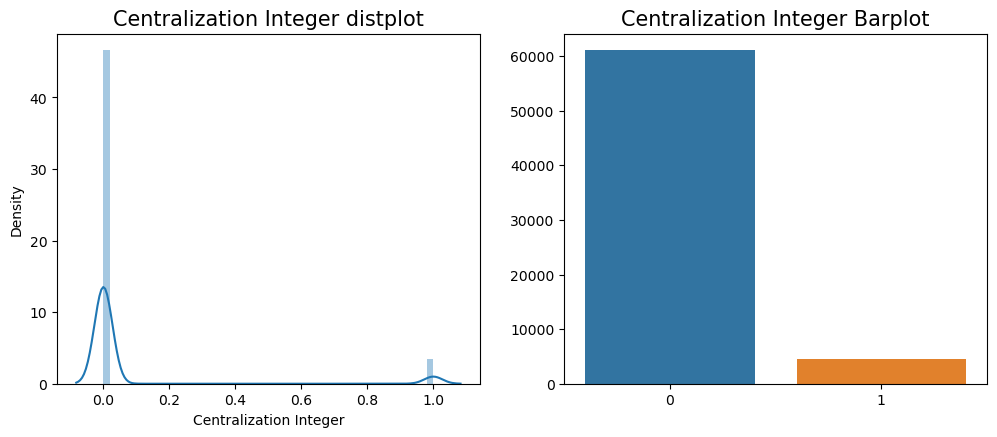

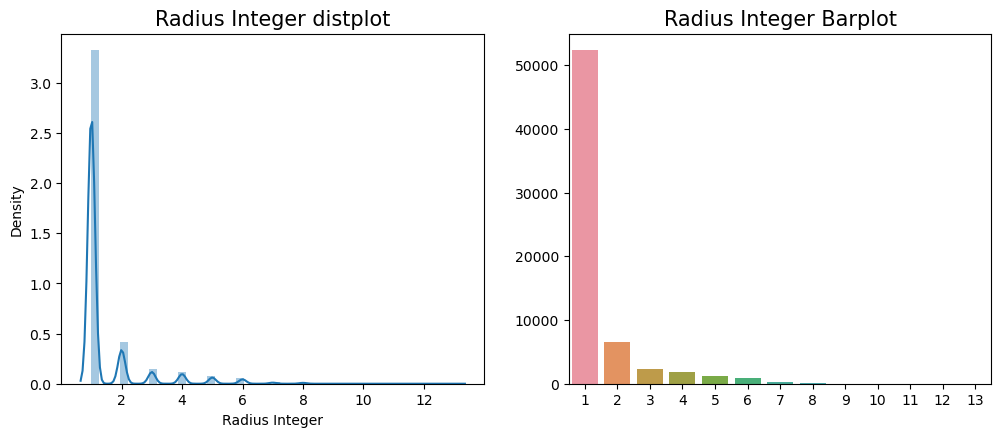

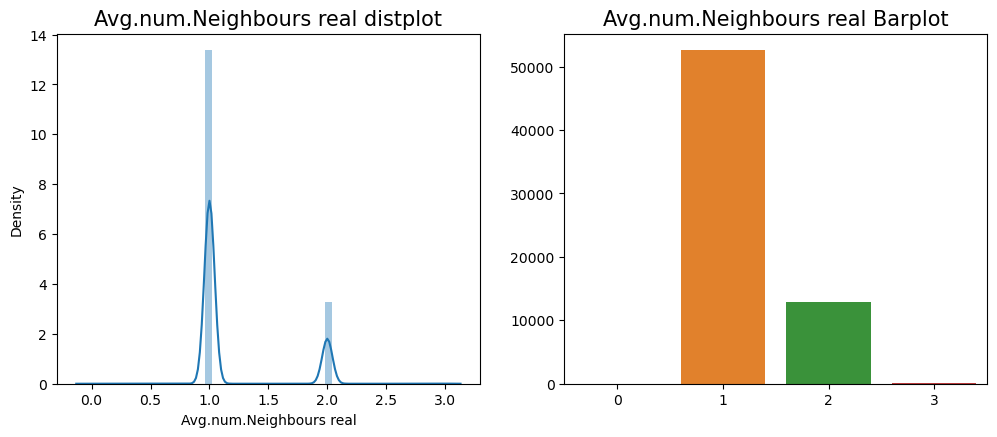

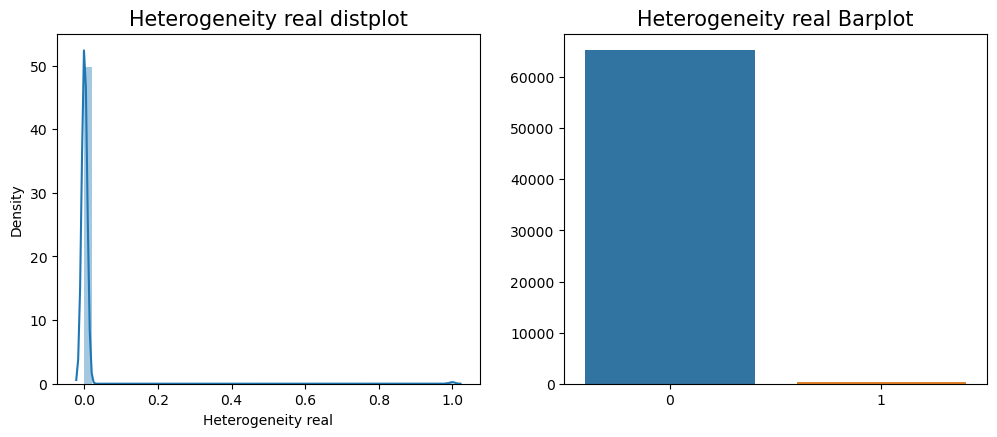

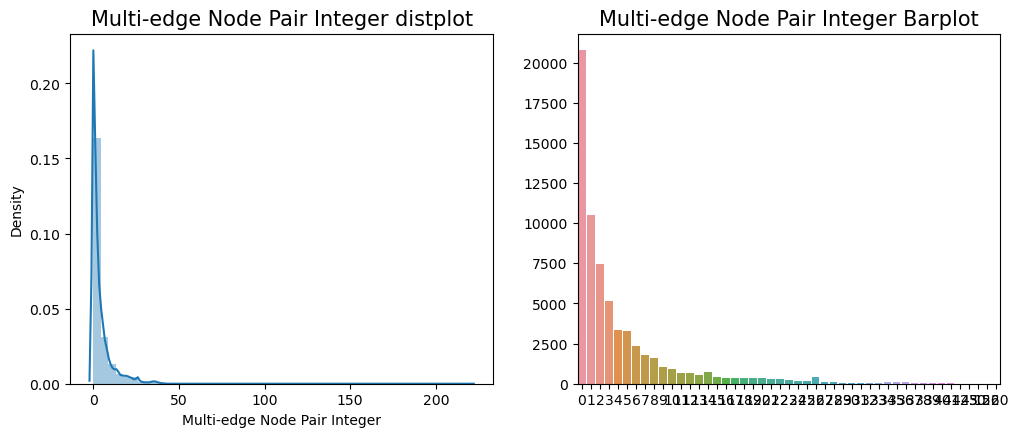

In [ ]:
def plot2(x):
    plt.figure(figsize = (12,10))
    plt.subplot(2,2,1)
    sns.distplot(df5[x])
    plt.title(x+' distplot', size=15)
    
    plt.subplot(2,2,2)
    sns.barplot( x=df5[x].value_counts().keys(), y=df5[x].value_counts().values )
    plt.title(x+' Barplot', size=15)
    
plot2('Centralization Integer')
plot2('Radius Integer')
plot2('Avg.num.Neighbours real')
plot2('Heterogeneity real')
plot2('Multi-edge Node Pair Integer')

##### OBSERVATIONS 1.1

###### 1. Centralization Integer - Here, It is Imbalanced because the number of zeroes much higher than 1, which not give us a good clarity about 1's. 
##### 2. Heterogeneity real -  Here, It is Imbalanced because the number of zeroes much higher than 1, which not give us a good clarity about 1's same as above.
##### 3. Avg.num.Neighbours real -  It is not imbalanced and also it is good representation of all of the characters in it.

###### 4. Multi-edge Node Pair Integer :- It is also a good representation of all values associated in it. 

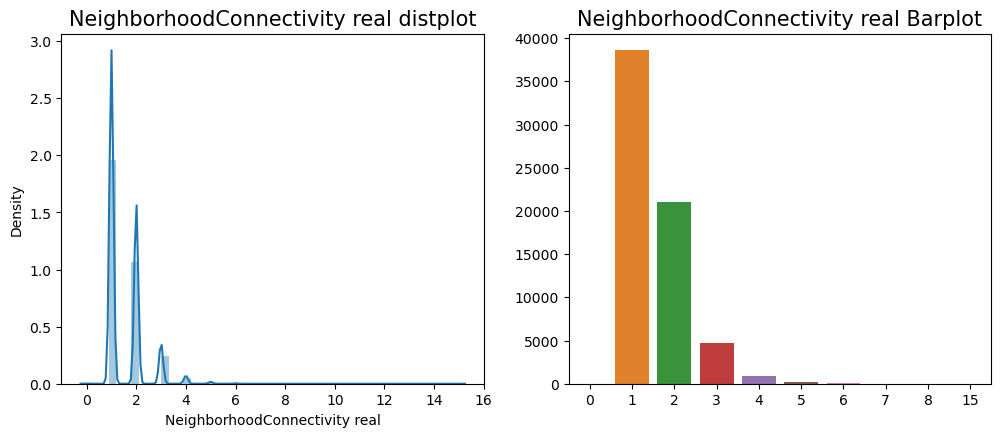

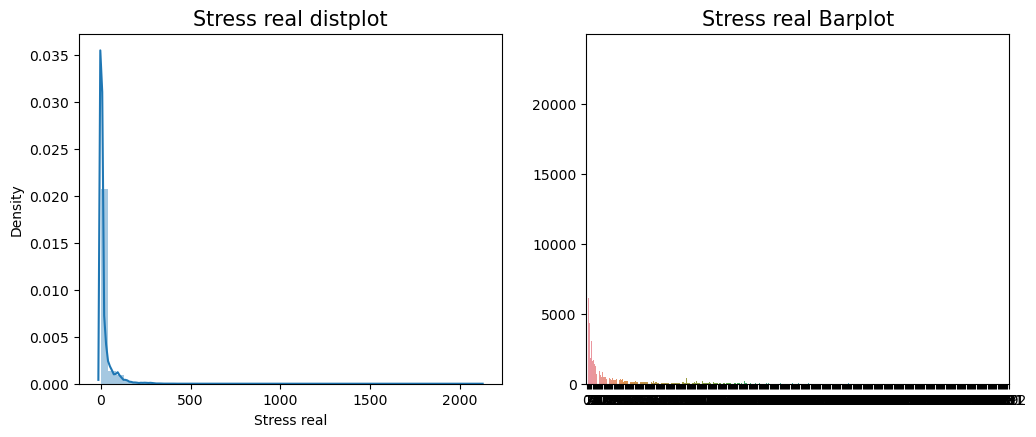

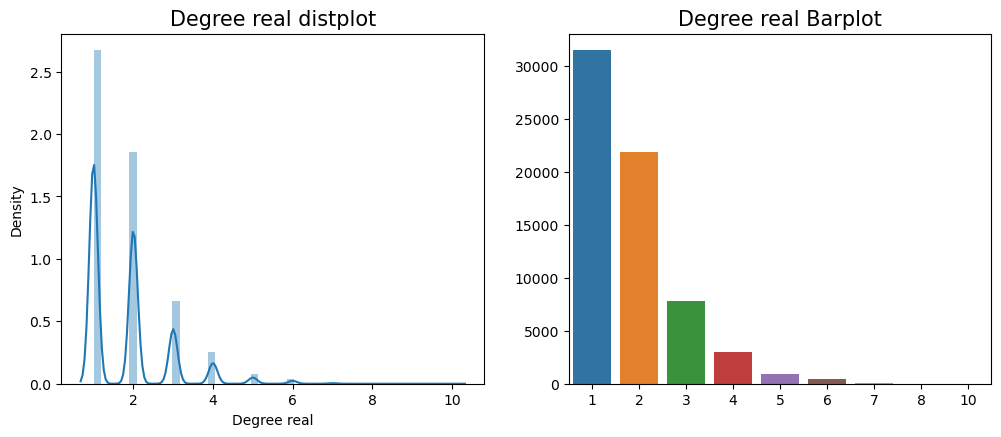

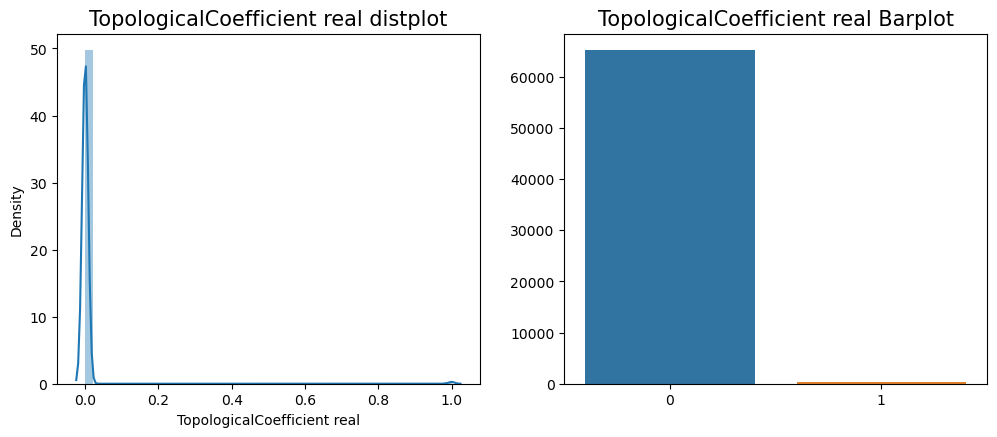

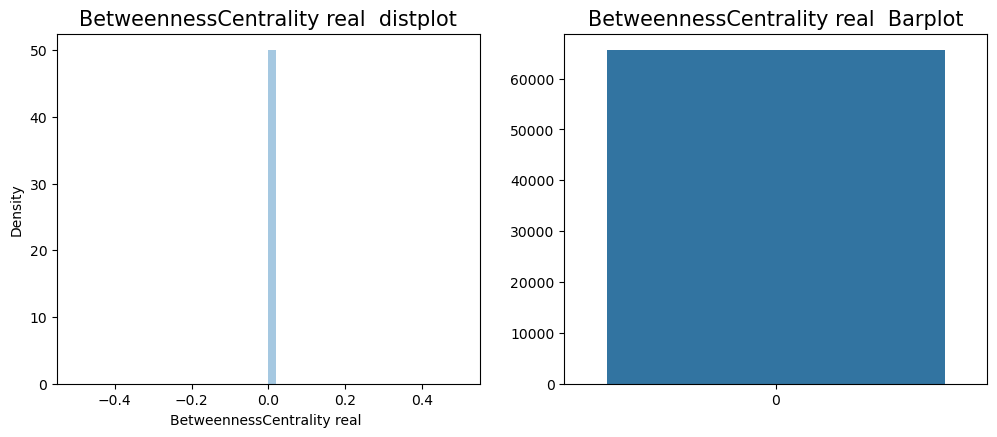

In [ ]:
plot2('NeighborhoodConnectivity real')
plot2('Stress real')
plot2('Degree real')
plot2('TopologicalCoefficient real')
plot2('BetweennessCentrality real ')

### OBSERVATIONS 1.2

###### 1. NeighborhoodConnectivity real :-  It is having multivariate values in it, which is giving good clarity about all variable.
###### 2. Stress real :- It is continous having highly heterogenous numbers in it.
###### 3. Degree real :- As per barplot having good number of multivariate variable in a good amount.
###### 4. TopologicalCoefficient real :- It is Imbalanced which having majorly numbers of 0 as comapred to 1, which creates sparsity.
###### 5. BetweennessCentrality real :- It is only having 0 in it, which means it is constant at all.

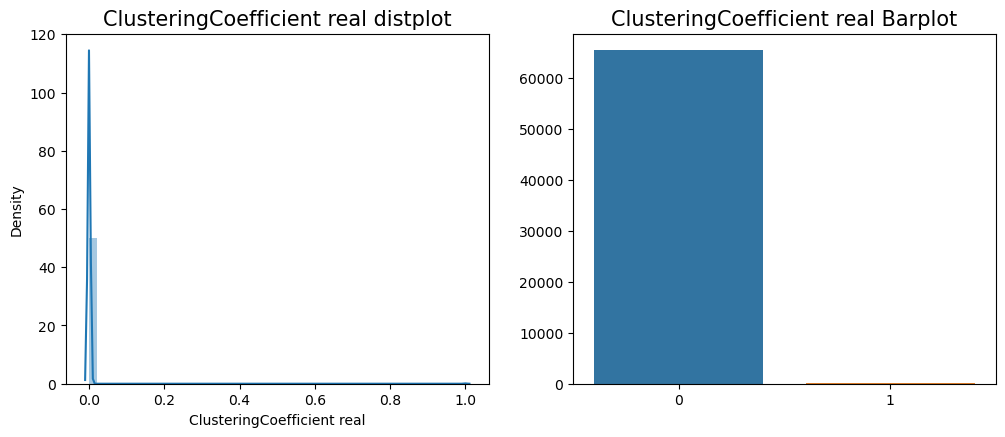

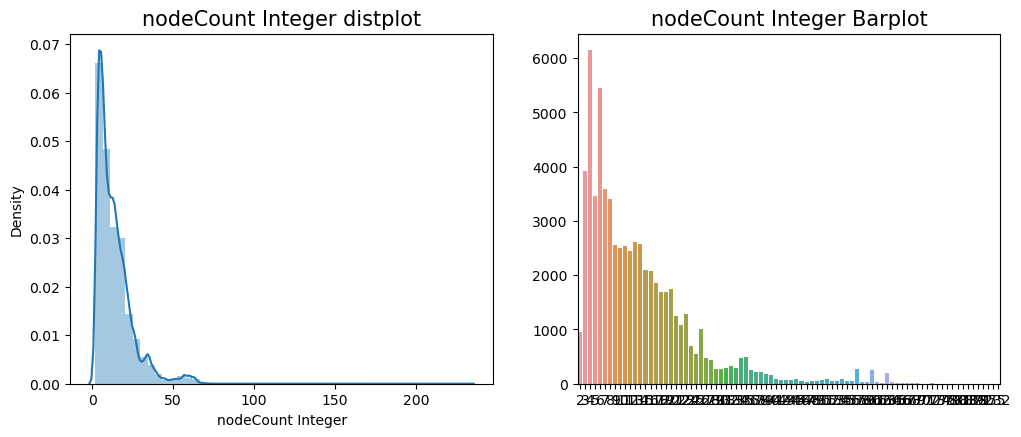

In [ ]:
plot2('ClusteringCoefficient real')
plot2('nodeCount Integer')

### OBSERVATIONS 1.3
##### 1. ClusteringCoefficient real :- It is Imbalanced which having majorly numbers of 0 as comapred to 1, which creates sparsity.
##### 2. nodeCount Integer :-  It is having variety of values associated in it, which is continous also and giving good represenation about it.

In [ ]:
df5.corr()*100

,Radius Integer,Centralization Integer,Avg.num.Neighbours real,Heterogeneity real,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,Degree real,TopologicalCoefficient real,BetweennessCentrality real,ClusteringCoefficient real,nodeCount Integer,Diameter
Radius Integer,100.000000,-10.816363,47.707582,-0.728460,28.265528,35.370837,39.457142,41.084676,2.642516,NaN,-1.275272,11.778189,44.371997
Centralization Integer,-10.816363,100.000000,-13.403209,-1.867027,-14.975051,-13.267183,-11.179717,-10.108624,-2.046750,NaN,-0.867770,-25.794742,-19.055132
Avg.num.Neighbours real,47.707582,-13.403209,100.000000,0.156462,53.721029,60.457756,52.500870,66.145445,15.096570,NaN,6.400566,30.863962,43.244770
Heterogeneity real,-0.728460,-1.867027,0.156462,100.000000,1.314261,30.773421,0.316968,3.540496,-0.519197,NaN,-0.220126,3.337660,0.324621
Multi-edge Node Pair Integer,28.265528,-14.975051,53.721029,1.314261,100.000000,47.099235,72.352158,71.670948,-4.215758,NaN,-1.476160,60.929302,61.793898
NeighborhoodConnectivity real,35.370837,-13.267183,60.457756,30.773421,47.099235,100.000000,38.731594,63.951413,4.843357,NaN,2.053461,31.508813,42.776061
Stress real,39.457142,-11.179717,52.500870,0.316968,72.352158,38.731594,100.000000,46.589046,-2.850712,NaN,-1.330341,60.485319,74.466635
Degree real,41.084676,-10.108624,66.145445,3.540496,71.670948,63.951413,46.589046,100.000000,3.158396,NaN,1.452598,28.428616,44.865189
TopologicalCoefficient real,2.642516,-2.046750,15.096570,-0.519197,-4.215758,4.843357,-2.850712,3.158396,100.000000,NaN,42.397481,-6.727232,-5.716400
BetweennessCentrality real,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df6 = df5.drop(columns = ['Centralization Integer',
                         'Heterogeneity real','TopologicalCoefficient real',
                         'BetweennessCentrality real ','ClusteringCoefficient real'])
df6.head(4) 

,Radius Integer,Avg.num.Neighbours real,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,Degree real,nodeCount Integer,Diameter
0,5,2,18,2,80,4,19,7
1,1,2,24,3,59,4,23,8
2,1,1,11,1,6,2,20,5
3,1,2,9,2,21,3,13,5


In [ ]:
df6.skew().sort_values(ascending= False)

Stress real                      8.635484
Multi-edge Node Pair Integer     3.271238
Radius Integer                   3.144516
nodeCount Integer                2.220424
NeighborhoodConnectivity real    1.701370
Diameter                         1.619886
Degree real                      1.549826
Avg.num.Neighbours real          1.525565
dtype: float64

In [ ]:
old_skew = df6.skew()
old_skew

Radius Integer                   3.144516
Avg.num.Neighbours real          1.525565
Multi-edge Node Pair Integer     3.271238
NeighborhoodConnectivity real    1.701370
Stress real                      8.635484
Degree real                      1.549826
nodeCount Integer                2.220424
Diameter                         1.619886
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer

def yeojohntrans(feature):
    
    yeojohntran = PowerTransformer(standardize = True)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Distribution before transformation', fontsize=15)
    sns.histplot(df6[feature], color='r')
    
    
    df_yeojohn = pd.DataFrame(yeojohntran.fit_transform(df6[feature].values.reshape(-1,1)))
    plt.subplot(1,2,2)
    plt.title('Distribution after Tranmission', fontsize=15)
    sns.histplot(df_yeojohn, kde=True, legend=False)
    plt.tight_layout()
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    

In [ ]:
df6.agg(['skew','kurtosis']).transpose().sort_values(by=['skew','kurtosis'],ascending=False)

,skew,kurtosis
Stress real,8.635484,243.769422
Multi-edge Node Pair Integer,3.271238,31.120950
Radius Integer,3.144516,10.753579
nodeCount Integer,2.220424,10.620341
NeighborhoodConnectivity real,1.701370,5.441606
Diameter,1.619886,3.639337
Degree real,1.549826,2.946818
Avg.num.Neighbours real,1.525565,0.468790


In [ ]:
#yeojohntran is used to remove skewness 

In [ ]:
yeojohntran = PowerTransformer(standardize = True)

df6['Stress real'] = pd.DataFrame(yeojohntran.fit_transform(df6['Stress real'].values.reshape(-1,1)))
print('After Yeo-JohnTrans skewness of Stress real: \t\t\t:',df6['Stress real'].skew())

df6['Multi-edge Node Pair Integer'] = pd.DataFrame(yeojohntran.fit_transform(df6['Multi-edge Node Pair Integer'].values.reshape(-1,1)))
print('After Yeo-JohnTrans skewness of Multi-edge Node Pair Integer \t:',df6['Multi-edge Node Pair Integer'].skew())

df6['nodeCount Integer'] = pd.DataFrame(yeojohntran.fit_transform(df6['nodeCount Integer'].values.reshape(-1,1)))
print('After Yeo-JohnTrans skewness of nodeCount Integer \t\t:',df6['nodeCount Integer'].skew())

df6['Degree real'] = pd.DataFrame(yeojohntran.fit_transform(df6['Degree real'].values.reshape(-1,1)))
print('After Yeo-JohnTrans skewness of Degree real \t\t\t:',df6['Degree real'].skew())

df6['NeighborhoodConnectivity real'] = pd.DataFrame(yeojohntran.fit_transform(df6['NeighborhoodConnectivity real'].values.reshape(-1,1)))
print('After Yeo-JohnTrans skewness of NeighborhoodConnectivity real \t:',df6['NeighborhoodConnectivity real'].skew())

df6['Radius Integer'] = pd.DataFrame(yeojohntran.fit_transform(df6['Radius Integer'].values.reshape(-1,1)))
print('After Yeo-JohnTrans skewness of Radius Integer: \t\t\t:',df6['Radius Integer'].skew())

After Yeo-JohnTrans skewness of Stress real: 			: 0.22755175237429082
After Yeo-JohnTrans skewness of Multi-edge Node Pair Integer 	: 0.12353451329774526
After Yeo-JohnTrans skewness of nodeCount Integer 		: 0.018568042719799675
After Yeo-JohnTrans skewness of Degree real 			: 0.2302675024721782
After Yeo-JohnTrans skewness of NeighborhoodConnectivity real 	: 0.07219144479300908
After Yeo-JohnTrans skewness of Radius Integer: 			: 1.4891828818478008


In [ ]:
df6.skew().sort_values(ascending = True)

nodeCount Integer                0.018568
NeighborhoodConnectivity real    0.072191
Multi-edge Node Pair Integer     0.123535
Stress real                      0.227552
Degree real                      0.230268
Radius Integer                   1.489183
Avg.num.Neighbours real          1.525565
Diameter                         1.619886
dtype: float64

## MODEL BUILDING

In [ ]:
st = StandardScaler()
st_transformed = st.fit_transform(df6)

st_transformed
df7 = pd.DataFrame(data = st_transformed ,columns = [*df6.columns])
df7

,Radius Integer,Avg.num.Neighbours real,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,Degree real,nodeCount Integer,Diameter
0,2.080386,2.001037,1.634957,0.999867,1.548689,1.658066,0.818260,0.829436
1,-0.502923,2.001037,1.792223,1.631905,1.455809,1.658066,1.069351,1.135798
2,-0.502923,-0.494046,1.340123,-0.800244,0.487980,0.615484,0.885992,0.216711
3,-0.502923,2.001037,1.211147,0.999867,1.078628,1.296016,0.310887,0.216711
4,-0.502923,2.001037,1.488478,1.631905,1.395256,1.296016,1.177863,0.829436
...,...,...,...,...,...,...,...,...
65548,-0.502923,-0.494046,-1.221939,-0.800244,-1.105602,-0.989645,-2.147711,-1.008740
65549,-0.502923,-0.494046,-1.221939,-0.800244,-1.105602,-0.989645,-0.739405,-1.008740
65550,-0.502923,-0.494046,-1.221939,-0.800244,-0.431448,-0.989645,2.209921,-0.396014
65551,-0.502923,-0.494046,-1.221939,-0.800244,-1.105602,-0.989645,1.571843,-0.702377


In [ ]:
df7.describe().astype(int)

,Radius Integer,Avg.num.Neighbours real,Multi-edge Node Pair Integer,NeighborhoodConnectivity real,Stress real,Degree real,nodeCount Integer,Diameter
count,65553,65553,65553,65553,65553,65553,65553,65553
mean,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1
min,0,-2,-1,-10,-1,0,-2,-1
25%,0,0,-1,0,-1,0,0,0
50%,0,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0,0
max,2,4,2,2,2,2,3,12


In [ ]:
X = df7.iloc[:,:-1]
y = df7.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=200)
print('Shape of Training set',X_train.shape)
print('Shape of testing set',X_test.shape)
print('Testing set shape',y_train.shape)
print('Testing set shape',y_test.shape)

Shape of Training set (52442, 7)
Shape of testing set (13111, 7)
Testing set shape (52442,)
Testing set shape (13111,)


## Model 1: Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train ,y_train)

print('Linear regression Coefficient :',lr.coef_*100, 
      
      '\n\nLinear regression Intercept(beta) :',lr.intercept_)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test ,y_pred)
print('\nR-sqaured score of Test set using Linear regression :',r2*100)

Linear regression Coefficient : [ -4.76904277   0.8326416    7.41283396 -23.85081475  98.08478144
  -7.67182858  10.46276091] 

Linear regression Intercept(beta) : 0.0007673479150089314

R-sqaured score of Test set using Linear regression : 78.59366289699544


## Model 2: Random Forest Regressor

In [ ]:
clf = RandomForestRegressor(n_estimators= 2 ,
                             max_depth= 2,
                             criterion='mse',
                             n_jobs =-1
                            )

# train model
clf.fit(X_train,y_train)

Y_pred1  = clf.predict(X_test)

print('R2 score using RandomForestRegressor :',r2_score(y_test,  Y_pred1)*100)

R2 score using RandomForestRegressor : 77.68634961362477


In [ ]:
lr2 = RandomForestRegressor()
params = [{"n_estimators" : [10,20],
           "max_features" : ["auto", "sqrt", "log2"],
           "min_samples_split" : [2,4,8,10],
           "bootstrap": [True, False]}]

           
cv = KFold(n_splits = 8, shuffle=True)

clf1 = GridSearchCV(lr2, param_grid=params,scoring='accuracy',
                      cv=cv,verbose = True, n_jobs=-1)

clf1.fit(X_train,y_train)

clf1_ypred = clf1.predict(X_test)

print('The R2 Score on Test set data :',r2_score(clf1_ypred, y_test)*100)

NameError: name 'X_train' is not defined

In [ ]:
clf1.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 10}

Text(0.5, 0, 'Errors')

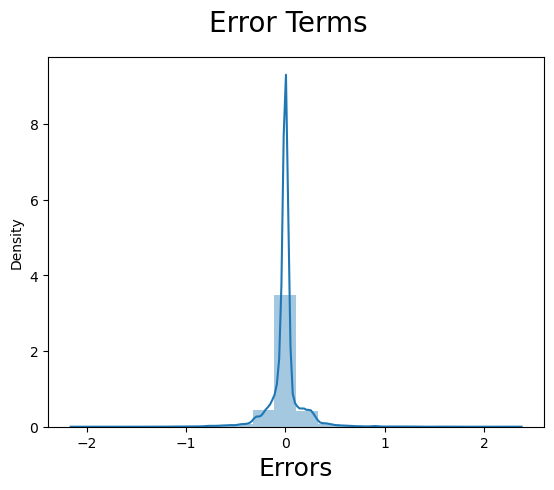

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test - clf1_ypred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Text(0, 0.5, 'y_pred')

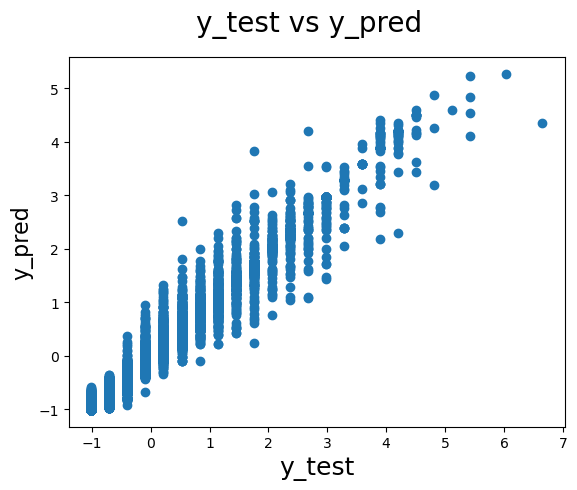

In [ ]:
#EVALUATION OF THE MODEL
fig = plt.figure()
plt.scatter(y_test,clf1_ypred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

## Model 3: XGBRegressor

In [ ]:
model = XGBRegressor()


model = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


model.fit(X_train, y_train)

y_pred2 = model.predict(X_test)

print('The R2 Score of XGBRegressor on Test dataset:',r2_score(y_pred2, y_test)*100)

The R2 Score of XGBRegressor on Test dataset: 97.01287509445528


## Model 4: Gradient Boosting Regressor

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth" : 4,
    "min_samples_split": 4,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
r2 = r2_score(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The adjusted R2 score on test set : {:.4f}".format(r2*100))

The mean squared error (MSE) on test set: 0.0548
The adjusted R2 score on test set : 94.4739


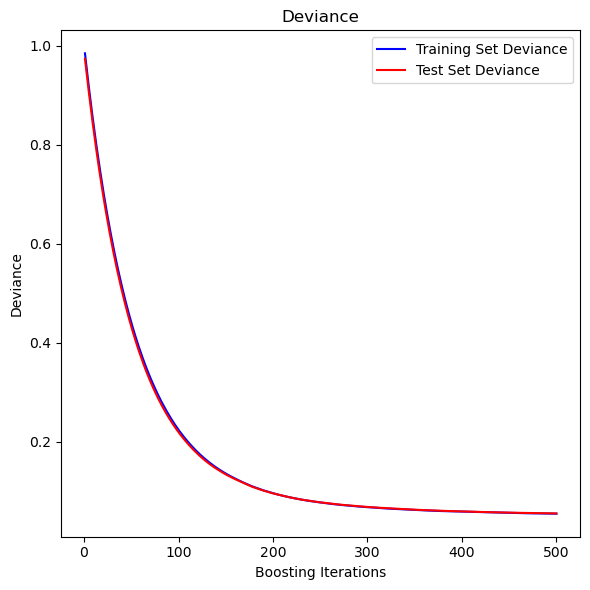

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### Conclusion : 

#### 1. Here,we have applied four different types of ML models to explain the variablity and to find the best adjusted R2 score among all models listed below with their R2 score's :

`1.1 LinearRegressor : 78.59`

`1.2 RandonForestRegressor : 97.01`

`1.3 XGBRegressor : 97.01`

`1.4 Gradient Boosting Regressor :94.47`

##### All the model listed above have different R2 score but the best adjusted R2 score is given by Random Forest Regressor

##### R-sqaured and Adjusted R-squared (extent of fit) - 0.9443 and 0.972 - 97% of variance explained.